In [1]:
# 모듈 호출
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [2]:
# 빅카인즈에서 '깃대종(flagship species)'이 언급된 기사
df = pd.read_csv('https://raw.githubusercontent.com/osgeokr/textmining/master/bigkinds_flagship_species.csv',
                 index_col='일자', parse_dates=True)
df.head(1)

,뉴스 식별자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출,본문,URL,분석제외 여부
일자,,,,,,,,,,,,,,,,,,
2019-06-28,1.100201e+06,국민일보,제주=주미령 기자,‘구상나무’ ‘산굴뚝나비’ 한라산국립공원 대표 생물종,지역>지역일반,NaN,NaN,NaN,NaN,NaN,이창호,"한반도,한라산,한라산국립공원,제주","백록담,한라산국립공원관리소,세계자연보전연맹,선정위원회","구상나무,산굴뚝나비,생물종,한라산국립공원,대표,세계,유산,본부,한라산국립공원관리소,...","한라산국립공원관리소,한라산국립공원,한라산,산굴뚝나비,생물종,국립공원,구상나무,깃대종...",세계유산본부 한라산국립공원관리소는 한라산의 생태 문화 지리적 특성을 띤 대표 생물종...,http://news.kmib.co.kr/article/view.asp?arcid=...,NaN


In [3]:
# 깃대종 기사 총 건수
print('깃대종 기사: ' + str(len(df)) + '건')

깃대종 기사: 1029건


In [4]:
# 깃대종 기사를 연별 건수로 그룹화
df1 = df.groupby(df.index.year).size()
df1

일자
1995      1
1996      5
1997      1
1998      1
1999      1
2000      1
2002      5
2003      2
2004      2
2005      3
2006     15
2007     24
2008     49
2009     49
2010     38
2011     54
2012     79
2013    133
2014    141
2015     81
2016     86
2017     98
2018    114
2019     46
dtype: int64

In [5]:
# x
df1.index

Int64Index([1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005, 2006,
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019],
           dtype='int64', name='일자')

In [6]:
# y
df1.values

array([  1,   5,   1,   1,   1,   1,   5,   2,   2,   3,  15,  24,  49,
        49,  38,  54,  79, 133, 141,  81,  86,  98, 114,  46], dtype=int64)

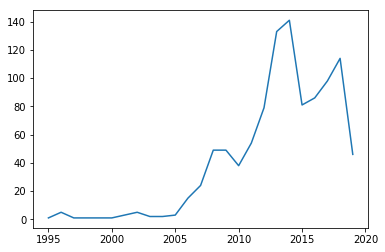

In [7]:
# plot(x, y)
plt.plot(df1.index, df1.values)

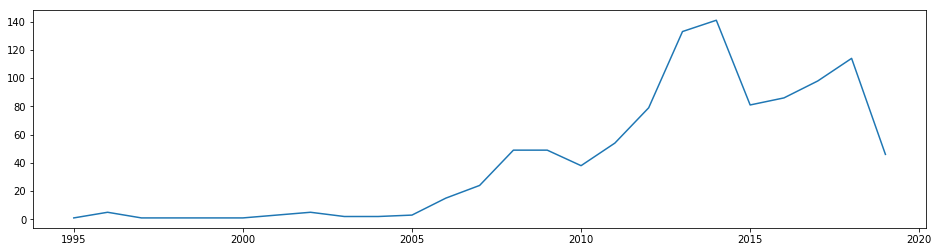

In [8]:
# fig, ax 조정
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(df1.index, df1.values)
plt.show()

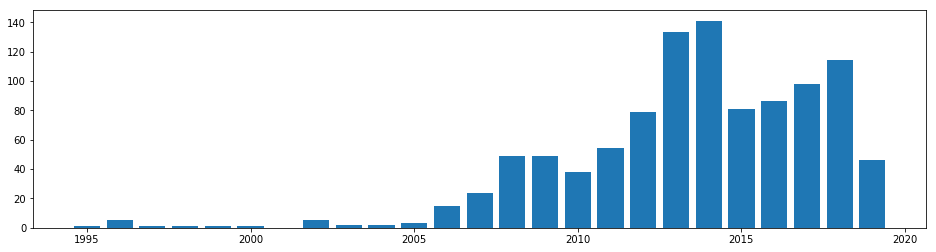

In [9]:
# 바 플롯
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,1,1)
ax1.bar(df1.index, df1.values)
plt.show()

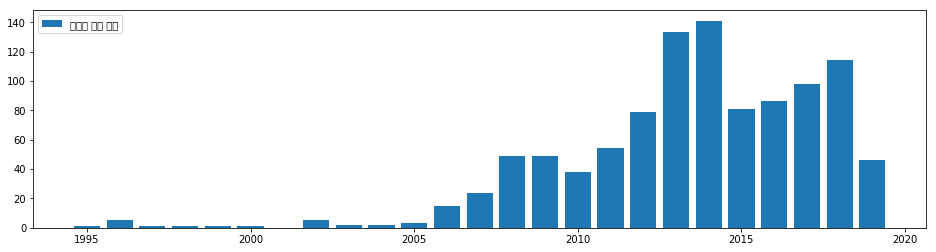

In [10]:
# 범례 추가
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,1,1)
ax1.bar(df1.index, df1.values)
ax1.legend(['깃대종 기사 건수'], loc='upper left')
plt.show()

In [11]:
# 폰트매니저
fm._rebuild()
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'KoPub' in f.name]

[('KoPubBatang', 'C:\\WINDOWS\\Fonts\\KoPubBatangBold.ttf'),
 ('KoPubBatang', 'C:\\Windows\\Fonts\\KoPubBatangLight.ttf'),
 ('KoPubDotum', 'C:\\WINDOWS\\Fonts\\KoPubDotumLight.ttf'),
 ('KoPubDotum', 'C:\\Windows\\Fonts\\KoPubDotumBold.ttf'),
 ('KoPubBatang', 'C:\\Windows\\Fonts\\KoPubBatangMedium.ttf'),
 ('KoPubDotum', 'C:\\WINDOWS\\Fonts\\KoPubDotumMedium.ttf')]

In [12]:
# Seaborn 설정
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)

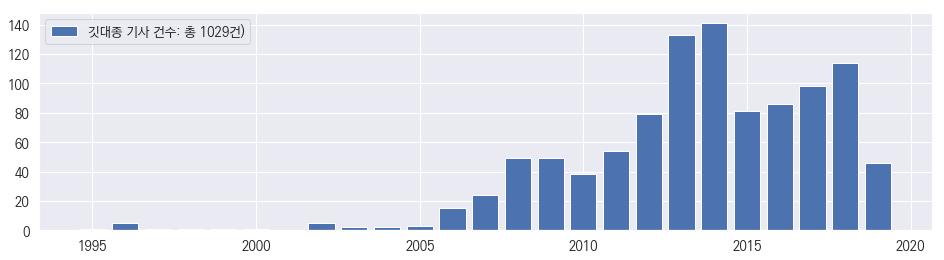

In [13]:
# Seaborn 설정 적용
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,1,1)
ax1.bar(df1.index, df1.values)
ax1.legend(['깃대종 기사 건수: 총 '+str(df1.values.sum())+'건)'], loc='upper left')
plt.show()

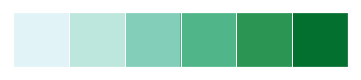

In [14]:
sns.palplot(sns.color_palette("BuGn"))

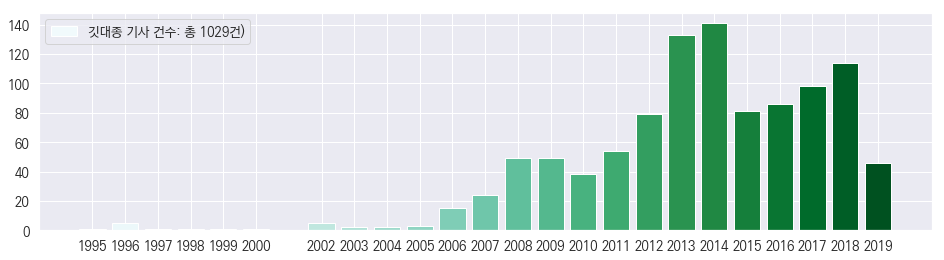

In [15]:
# 색상 팔레트 적용
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,1,1)
ax1.bar(df1.index, df1.values, color=sns.color_palette("BuGn", df1.index.size))
ax1.set_xticks(df1.index)
ax1.legend(['깃대종 기사 건수: 총 '+str(df1.values.sum())+'건)'], loc='upper left')
plt.show()

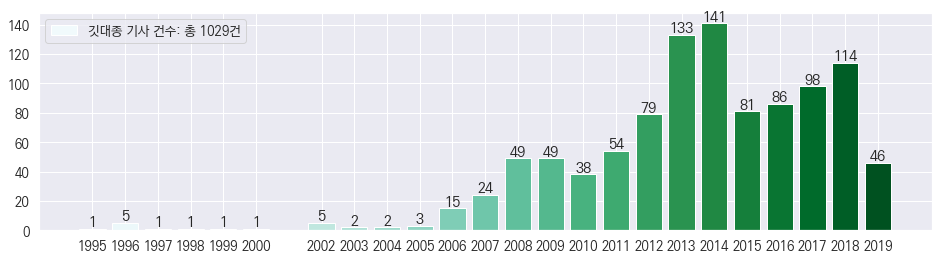

In [16]:
# 바 플롯 위에 라벨 추가
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,1,1)
rects = ax1.bar(df1.index, df1.values, color=sns.color_palette("BuGn", df1.index.size))
for rect in rects:
              height = rect.get_height()
              ax1.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax1.set_xticks(df1.index)
ax1.legend(['깃대종 기사 건수: 총 '+str(df1.values.sum())+'건'], loc='upper left')
plt.show()

In [17]:
# '제목' 또는 '본문'에 '국립공원'이 포함된 기사 선택
df2 = df[df['제목'].str.contains('국립공원') | df['본문'].str.contains('국립공원')]
df2.head(1)

,뉴스 식별자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출,본문,URL,분석제외 여부
일자,,,,,,,,,,,,,,,,,,
2019-06-28,1.100201e+06,국민일보,제주=주미령 기자,‘구상나무’ ‘산굴뚝나비’ 한라산국립공원 대표 생물종,지역>지역일반,NaN,NaN,NaN,NaN,NaN,이창호,"한반도,한라산,한라산국립공원,제주","백록담,한라산국립공원관리소,세계자연보전연맹,선정위원회","구상나무,산굴뚝나비,생물종,한라산국립공원,대표,세계,유산,본부,한라산국립공원관리소,...","한라산국립공원관리소,한라산국립공원,한라산,산굴뚝나비,생물종,국립공원,구상나무,깃대종...",세계유산본부 한라산국립공원관리소는 한라산의 생태 문화 지리적 특성을 띤 대표 생물종...,http://news.kmib.co.kr/article/view.asp?arcid=...,NaN


In [18]:
# 국립공원이 언급된 기사 건수
df2 = df2.groupby(df2.index.year).size()
df2

일자
2006     2
2007    11
2008    35
2009    27
2010    18
2011    27
2012    42
2013    39
2014    49
2015    29
2016    21
2017    33
2018    27
2019    20
dtype: int64

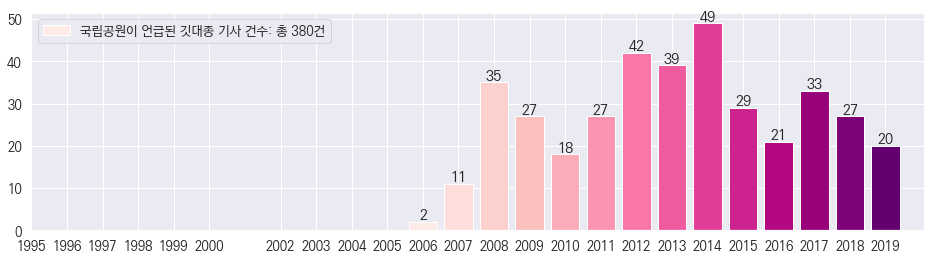

In [19]:
# 국립공원이 언급된 기사 건수 바 플롯
fig = plt.figure(figsize=(16,4))
ax2 = fig.add_subplot(1,1,1)
rects = ax2.bar(df2.index, df2.values, color=sns.color_palette("RdPu", df2.index.size))
for rect in rects:
              height = rect.get_height()
              ax2.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax2.set_xticks(df1.index)
ax2.legend(['국립공원이 언급된 깃대종 기사 건수: 총 '+str(df2.values.sum())+'건'], loc='upper left')
plt.show()

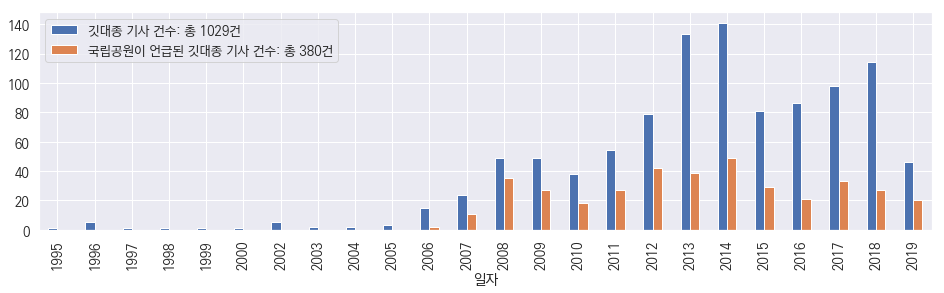

In [20]:
# 깃대종 기사 건수 vs. 국립공원이 언급된 깃대종 기사 건수 바 플롯
pd.concat([df1, df2], axis=1).plot(kind='bar', figsize=(16, 4))
plt.legend(['깃대종 기사 건수: 총 '+str(df1.values.sum())+'건',
            '국립공원이 언급된 깃대종 기사 건수: 총 '+str(df2.values.sum())+'건'])
plt.savefig('D:/GEODATA/깃대종 기사 건수 시각화.png', bbox_inches='tight')